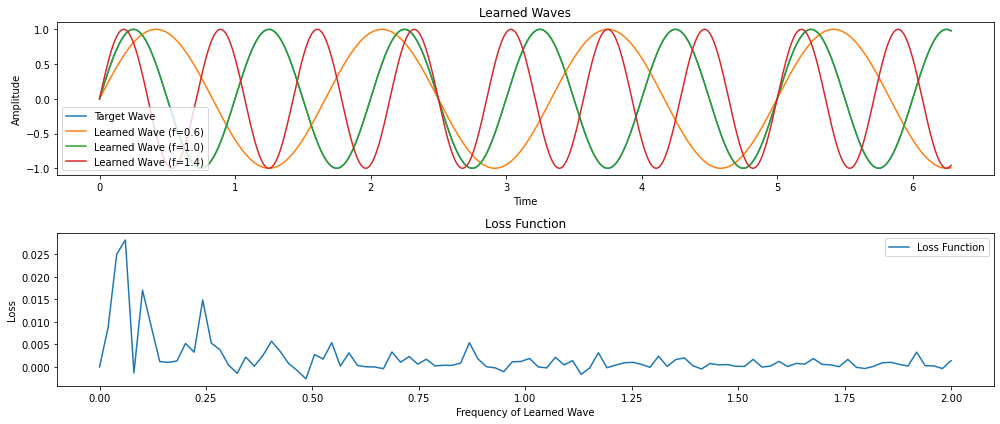

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed parameters
A = 1  # Amplitude
phi = 0  # Phase

# Define the frequency for the target wave
f_target = 1

# Define the range for the frequency of the learned wave
f_learned_range = np.linspace(0.0, 2.0, 100)

# Define the time variable
t = np.linspace(0, 2*np.pi, 10000)

# Generate the target sine wave
target_wave = A * np.sin(2 * np.pi * f_target * t + phi)

def sample_arrays(target, learned, x):
    indices = np.random.choice(len(target), size=x, replace=False)
    sampled_target = target[indices]
    sampled_learned = learned[indices]
    return sampled_target, sampled_learned, indices

# Function to generate the learned wave
def generate_learned_wave(f):
    return A * np.sin(2 * np.pi * f * t + phi)

def loss_function_m(target, learned):
    return np.mean((target - learned) ** 2)

# Define the loss function (mean squared error)
def loss_function_c(target, learned):
    greater_than = np.sum(learned > target)
    less_than = np.sum(learned < target)
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_a(target, learned):
    diff = learned - target
    greater_than = np.sum(np.abs(diff[diff > 0]))
    less_than = np.sum(np.abs(diff[diff < 0]))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_L(target, learned):
    target, learned = sample_arrays(target, learned, 10000)
    diff = learned - target
    greater_than = np.sum(np.log(np.abs(diff[diff > 0])))
    less_than = np.sum(np.log(np.abs(diff[diff < 0])))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_d1(target, learned):
    #target, learned = sample_arrays(target, learned, 10000)
    diff = learned - target
    greater_than = np.sum(np.log(np.abs(diff[diff > 0])))
    less_than = np.sum(np.log(np.abs(diff[diff < 0])))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_aa(target, learned):
    target, learned, _ = sample_arrays(target, learned, 100)
    prod = learned * target
    return np.average(prod)

def loss_function_aa(target, learned):
    target, learned, _ = sample_arrays(target, learned, 1000)
    prod = np.outer(learned, target)
    #print(prod.shape)
    return np.average(prod)



# Calculate the loss for each frequency in the range
losses = []
for f in f_learned_range:
    learned_wave = generate_learned_wave(f)
    loss = loss_function_aa(target_wave, learned_wave)
    losses.append(loss)

# Plot the target wave
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, target_wave, label='Target Wave')
plt.title('Target Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot the learned waves for selected frequencies
selected_frequencies = [0.6, 1, 1.4]
for f in selected_frequencies:
    learned_wave = generate_learned_wave(f)
    plt.plot(t, learned_wave, label=f'Learned Wave (f={f:.1f})')
plt.title('Learned Waves')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot the loss function
plt.subplot(2, 1, 2)
plt.plot(f_learned_range, losses, label='Loss Function')
plt.title('Loss Function')
plt.xlabel('Frequency of Learned Wave')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
